# Perkenalan
* Nama: Devan Setya Putra
*  Batch: HCK 004

# **`Identifikasi Masalah`**



## `Latar Belakang`

Perusahaan GOJEK ingin melihat jumlah merchent yang terdaftar di GOFOOD dari 3 kota terbesar di Indonesia (Jakarta, Surabaya dan Medan), kemudian ingin melihat apakah penerapan diskon di 1 kota akan mempengaruhi keputusan diskon di kota lain, berhubung karena merchent tersebut merupakan jenis pasar Monopolistik yang memiliki tingkat persaingan yang sangat ketat. 

## `S.M.A.R.T`

* Specific=> Meningkatkan jumlah merchent.
* Measurable=> saat jumlah merchent naik lebih dari 50% selama 3 tahun kedepan.
* Achievable=> Meningkatkan pemasaran produk dan kelebihan produk agar banyak merchent baru yang tertarik.
* Relevant=> Dengan meningkatnya jumlah merchent, maka akan meningkatkan total pengguna gojek, gofood hingga gopay dan secara jangka pendek akan menambahkan total pendapatan dan secara jangka panjang akan menstabilkan keuangan.
* Time-bound=> 3 tahun kedepan.

## 5W+1H
* Kota mana dengan total merchan terbanyak?
* Bagaimana rata-rata diskon di tiap tiap kota?
* Apakah setiap kota memiliki category yang berbeda?
* Dimana kota yang memiliki jumlah diskon terbesar?
* Brand mana apakah yang berada di tiap kota?

# `Data Loading`

In [1]:
#**Library**
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.mlab as mlab
from scipy.stats import t
from scipy import integrate
from tabulate import tabulate
from IPython.display import display

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('gofood_dataset.csv')
df.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,NaN,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...


`Data yang digunakan adalah data gofood yang berisi:`
* merchant_name-> nama Merchant dengan nama region
* merchant_area-> nama kota tempat merchent tersebut berada
* Category-> jenis makanan yang dipakai
* display-> foto yang digunakan untuk profil makanan pada menu gofood
* product -> menu makanan atau minuman
* Price -> Harga Makanan sebelum diskon
* discount_price-> harga makanan setelah discount
* isdiscount-> 0 untuk menu yang tidak ada diskon dan 1 untuk menu yang ada diskon

# `Data Cleaning`

`check unique / value variabel`

In [4]:
for i in df.columns:
  print('Value Variabel {} is {}'.format(i,df[i].unique()))

Value Variabel merchant_name is ['330 Kopi, Ciledug' 'Abe Steak, Cibubur' 'Abuba Steak, Cikarang'
 'Aneka Gorengan Siaga' 'Arangsimpur' 'Ayam Trolok' 'BABAKARAN BUNDA DAFA'
 'Bakerman, SCBD' 'Bakmi Kun' 'Bakmi Lopui 93' 'Bakso Titoti, Parung'
 'Banzai!, Bogor Utara' 'Sosis Bakar By Basis.Kuy, Intercon'
 'Bebek Boedjang, BSD' 'Boonsikdang, Hublife Jakarta'
 'Bunga Bakery, Cibinong' 'Bunga Bakery, Depok' 'Burger Bros, Bintaro'
 'Burger Bros, Ciledug' 'Burger Naura' 'C7HomeCoffee' 'Cafe OTSS'
 'Cake Pandeglang Cake' 'Chateraise, Senayan City' 'CIATER BEACH'
 'Cimory Condet, Balekambang' 'Cinepolis, Pondok Kelapa' 'Coffee First'
 'Corndog Doona, Pinang' 'Corndog Mozarella' 'Cotta Coffee, Jatiwaringin'
 'Crackling' 'Dapur Aliqa, Gembong' 'Dapur Cokelat, Cibubur'
 'Dapur Cokelat, Ciputat' 'Dapur Cokelat, Ciracas' 'Dapur Cokelat, Depok'
 'Dear Butter, Pakubuwono' 'Dough Lab, Senopati' 'DuriAnd, Bogor'
 'Emados Shawarma, Condet' 'Emados Shawarma, Depok' 'Faasos, Bintaro'
 'Faasos, Blok M' 'Fam

Ditemukan uniq value yang mana:
* total merchent_name yang terdata di gofood pada 3 kota besar adalah 687 merchent
* terdapat merchent_area pada data (3 kota besar)
* terdapat 333 category berbeda
* terdapat 2986 profil yang berbeda
* terdapat 23,917 menu yang ada di Gofood

In [5]:
for i in df.columns:
  print('total variation {} as much {}'.format(i,df[i].nunique()))

total variation merchant_name as much 687
total variation merchant_area as much 3
total variation category as much 333
total variation display as much 2986
total variation product as much 23917
total variation price as much 1769
total variation discount_price as much 553
total variation isDiscount as much 2
total variation description as much 12362


## Check Missing Value

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


In [7]:
df.isnull().sum()

merchant_name         0
merchant_area         0
category              0
display               0
product               0
price                 0
discount_price    42457
isDiscount            0
description       23475
dtype: int64

In [8]:
(df.isna().sum()*100/len(df)).sort_values(ascending=False)

discount_price    93.941808
description       51.941586
merchant_name      0.000000
merchant_area      0.000000
category           0.000000
display            0.000000
product            0.000000
price              0.000000
isDiscount         0.000000
dtype: float64

* missing value ditemukan pada kolom discount_price sebanyak 42,457 yang mana merupakan 93.94% dari total data
* missing value ditemukan pada kolom description sebanyak 23,475 yang mana merupakan 51.94% dari total data

* Missing value pada kolom dicount_price akan dilakukan tindakan fillna dengan nilai price, jika tidak ada diskon maka data akan diisi dengan price yang ada.
* sedangkan untuk kolom description akan dihapus.

In [9]:
diskon = df.loc[df['isDiscount']== 1].sort_values(by='discount_price', ascending=True)
diskon.isnull().sum()

merchant_name       0
merchant_area       0
category            0
display             0
product             0
price               0
discount_price      0
isDiscount          0
description       613
dtype: int64

In [10]:
no_diskon = df.loc[df['isDiscount']== 0].sort_values(by='discount_price', ascending=False)
no_diskon.isnull().sum()

merchant_name         0
merchant_area         0
category              0
display               0
product               0
price                 0
discount_price    42457
isDiscount            0
description       22862
dtype: int64

* pengecekan data pada kolom discount price, apakah yang terdata memiliki diskon tidak ada missing value. dan untuk hasilnya pada isdisko 1 tidak terdapat missing value dan missing value hanya pada product yang tidak memiliki diskon.

In [11]:
df['discount_price'].fillna(df['price'], inplace = True)

In [12]:
df.isnull().sum()

merchant_name         0
merchant_area         0
category              0
display               0
product               0
price                 0
discount_price        0
isDiscount            0
description       23475
dtype: int64

* nilai missing value setelah dilakukan fillna pada kolom discount_price

* kemudian dilakuakn drop kolom description

In [13]:
df.drop('description',axis=1,inplace=True)

In [14]:
df.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,20000.0,0
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,22000.0,0
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,20000.0,0
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,20000.0,0
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,22000.0,0


In [15]:
df.isnull().sum()

merchant_name     0
merchant_area     0
category          0
display           0
product           0
price             0
discount_price    0
isDiscount        0
dtype: int64

* Data pada kolom merchant_name dilakukan split data dan dibagi 2, sehingga diketahui nama brand nya saja dan nama regionnya saja

In [16]:
df[['Brand','Region']] = df['merchant_name'].str.split(',',expand=True,n=2)
df.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,Brand,Region
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,20000.0,0,330 Kopi,Ciledug
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,22000.0,0,330 Kopi,Ciledug
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,20000.0,0,330 Kopi,Ciledug
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,20000.0,0,330 Kopi,Ciledug
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,22000.0,0,330 Kopi,Ciledug


# `Analisis dan perhitungan`

* Pembuatan plot barh, untuk membandingkan data total menu yang mendapat diskon dan tidak pada 3 kota besar di Indonesia

Text(0, 0.5, '')

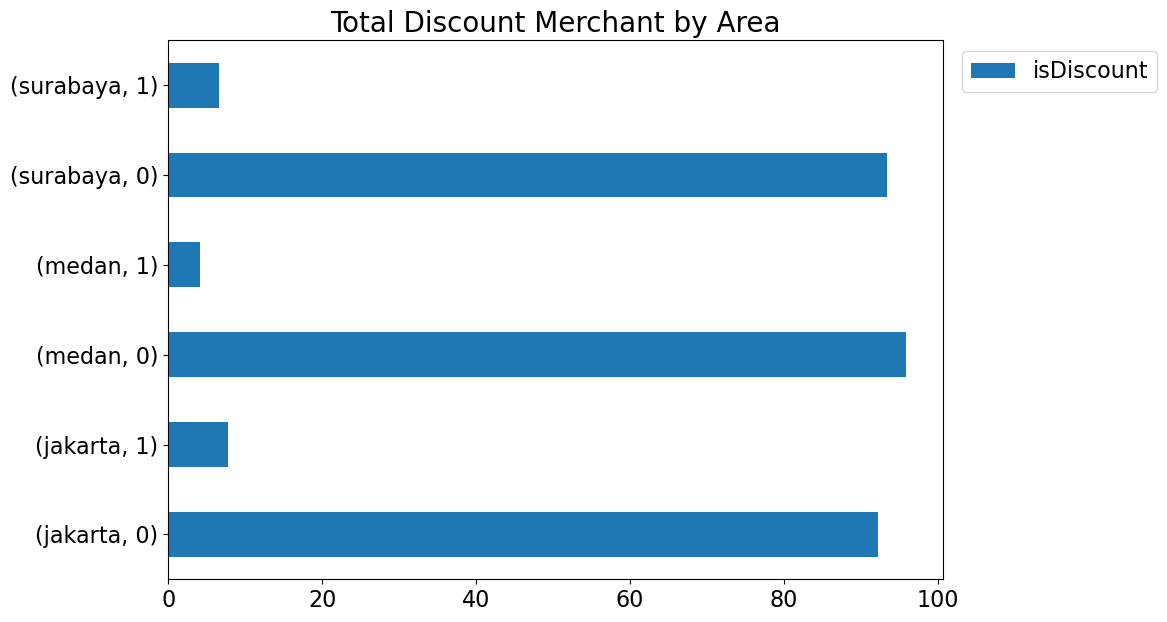

In [17]:
df1 = df.groupby(['merchant_area','isDiscount']).agg({'isDiscount': 'count'})
percen = df.groupby(['merchant_area']).agg({'isDiscount': 'count'})
df1 = df1.div(percen, level='merchant_area') * 100
plt.rcParams["figure.figsize"] = (10,7)
df1.plot(kind='barh')
plt.title("Total Discount Merchant by Area",fontsize=20)
plt.legend(loc='upper center',bbox_to_anchor=(1.15, 1),fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('')

* dapat dilihat bahwa jauh lebih banyak menu yang tidak memiliki diskon dibandingkan menu yang mendapat diskon

`persentase diskon brand tertinggi (with location)`

* proses pembuatan kolom persentase diskon dengan rumus (price-price discount)/price *100

In [18]:
df['perc_disc'] = (df['price']-df['discount_price'])/df['price']*100

* ingin melihat rata-rata diskon brand yang terdapat di 3 kota besar, yaitu:
    * Bakmi Lopui 93 dengan rata-rata diskon 20% (Jakarta)
    * Besty Cemilan dengan rata-rata diskon 16.07% (Medan)
    * Subsidi  dengan rata-rata diskon 19.09% (Surabaya)

In [19]:
disc = pd.DataFrame()
col = df['merchant_area'].unique()

for i in col:
  df1 = df[df.merchant_area==i]
  df1[['Brand','region']] = df1['merchant_name'].str.split(',',expand=True,n=2)
  df1 = pd.DataFrame(df1.groupby('Brand').mean()['perc_disc'].sort_values(ascending=False).reset_index())
  df1 = pd.concat([disc, df1])
  print('rata-rata persentase diskon brand kota {}\n'.format(i),df1)

/var/folders/kt/0jyjyc0j4x55lktsjdv8ch3w0000gn/T/ipykernel_6468/2480866381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Brand','region']] = df1['merchant_name'].str.split(',',expand=True,n=2)
/var/folders/kt/0jyjyc0j4x55lktsjdv8ch3w0000gn/T/ipykernel_6468/2480866381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Brand','region']] = df1['merchant_name'].str.split(',',expand=True,n=2)
/var/folders/kt/0jyjyc0j4x55lktsjdv8ch3w0000gn/T/ipykernel_6468/2480866381.py:7: FutureWarning: The de

rata-rata persentase diskon brand kota jakarta
                         Brand  perc_disc
0              Bakmi Lopui 93  20.000000
1                 MAB Toppoki  13.060334
2                 Kebab Lumer  13.000000
3        Pentol Seafood Korea  11.666667
4                   Starbucks  10.151547
5       Pita Cappucino Cincau   8.546366
6        BABAKARAN BUNDA DAFA   8.524590
7           Gianni's Pizzeria   7.900000
8               Potato Potter   6.000000
9                 Burger Bros   5.995069
10              Murabae Bento   5.281081
11                 JACK DONUT   5.208333
12              Longpan Pizza   4.997797
13             Podomoro Bakso   4.639812
14         Mie Aceh Abunawas    4.451339
15                Ayam Trolok   3.529412
16         Sosis Bakar Gangan   3.529412
17                    Banzai!   3.356825
18    Shihlin Ciputra Cibubur   3.227362
19               Geprek Bensu   3.134545
20                     HokBen   3.052214
21                     Faasos   3.014026
22       

/var/folders/kt/0jyjyc0j4x55lktsjdv8ch3w0000gn/T/ipykernel_6468/2480866381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Brand','region']] = df1['merchant_name'].str.split(',',expand=True,n=2)
/var/folders/kt/0jyjyc0j4x55lktsjdv8ch3w0000gn/T/ipykernel_6468/2480866381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Brand','region']] = df1['merchant_name'].str.split(',',expand=True,n=2)
/var/folders/kt/0jyjyc0j4x55lktsjdv8ch3w0000gn/T/ipykernel_6468/2480866381.py:7: FutureWarning: The de

* `Membuat dataframe dengan dengan urutan diskon terbesar menurut masing-masing kota`

In [20]:
disc = pd.DataFrame()
col = df['merchant_area'].unique()

for i in col:
  filter = df[df.merchant_area==i].sort_values("perc_disc",ascending=False).head(50)
  filter.drop(filter.columns[[2,3,4,5,6,7,8]],axis=1,inplace=True)
  filter.drop_duplicates('merchant_name',inplace=True)
  disc = pd.concat([disc, filter])

disc

,merchant_name,merchant_area,Region,perc_disc
12698,"Starbucks, Sudirman Bogor",jakarta,Sudirman Bogor,56.140351
2846,"FamilyMart, Sequis Tower",jakarta,Sequis Tower,50.000000
1829,"Corndog Doona, Pinang",jakarta,Pinang,50.000000
13954,"XXI Cafe, PGC",jakarta,PGC,36.363636
4106,"HokBen, Bogor Yasmin",jakarta,Bogor Yasmin,35.000000
14128,Ahmeds Kitchen,medan,None,68.181818
15499,Bolen Quemami Bakery,medan,None,60.606061
29238,"Warung Jivano, Marelan",medan,Marelan,59.701493
27367,"Starbucks, Multatuli Medan",medan,Multatuli Medan,56.140351
27957,"Sushi Yay, Medan Setiabudi",medan,Medan Setiabudi,50.000294


* Melihat nilai rata-rata, min, dan max di 3 kota besar
    * rata-rata harga setelah diskon terbesar adalah di Jakarta dengan harga sebesar 50,312

In [21]:
df.groupby('merchant_area').agg({'discount_price': ['mean', 'min', 'max']})

discount_price                  
                        mean    min        max
merchant_area                                 
jakarta         50312.205446    1.0  1980000.0
medan           40104.379617  200.0  1980000.0
surabaya        39938.414203    1.0  1980000.0

* Melihat dan membandingkan jumlah Brand terbanyak yang terdata di tiap kota

In [22]:
df2 = pd.DataFrame(df.groupby('merchant_area')['Brand'].value_counts().unstack(fill_value=0).T)

jkt = df2.sort_values(['jakarta'],ascending=False).head(5)
display('Most Brand in Jakarta ', jkt)
print('\n')
mdn = df2.sort_values(['medan'],ascending=False).head(5)
display('Most Brand in Medan ', mdn)
print('\n')
sby = df2.sort_values(['surabaya'],ascending=False).head(5)
display('Most Brand in Surabaya ', sby)

'Most Brand in Jakarta '

merchant_area,jakarta,medan,surabaya
Brand,,,
Lawson,1795,0,0
McDonald's,905,125,250
Dapur Cokelat,549,0,0
Michelle Bakery,474,0,0
KFC,393,400,63


'Most Brand in Medan '

merchant_area,jakarta,medan,surabaya
Brand,,,
Choco Bakery,0,592,0
Bika Ambon Zulaikha,0,435,0
Zeribowl,0,426,0
Fritto Chicken,0,400,0
KFC,393,400,63


'Most Brand in Surabaya '

merchant_area,jakarta,medan,surabaya
Brand,,,
Holland Bakery,240,0,594
Kampoeng Roti,0,0,331
Haus!,0,0,273
Satria Roti,0,0,257
Warung Pindo,0,0,254


In [23]:
df3 = df2[(df2.jakarta != 0) & (df2.medan != 0) & (df2.surabaya != 0)]
df3.sort_values(['jakarta','medan','surabaya'],ascending=False).head(5)

merchant_area,jakarta,medan,surabaya
Brand,,,
McDonald's,905,125,250
KFC,393,400,63
Menantea,280,40,116
Burger Bros,229,69,69
Dear Butter,26,26,54


* Dikota Jakarta, brand terbanyak teradapat pada Mc.Donald

<AxesSubplot: title={'center': 'Big 5 Brand in Jakarta'}, ylabel='jakarta'>

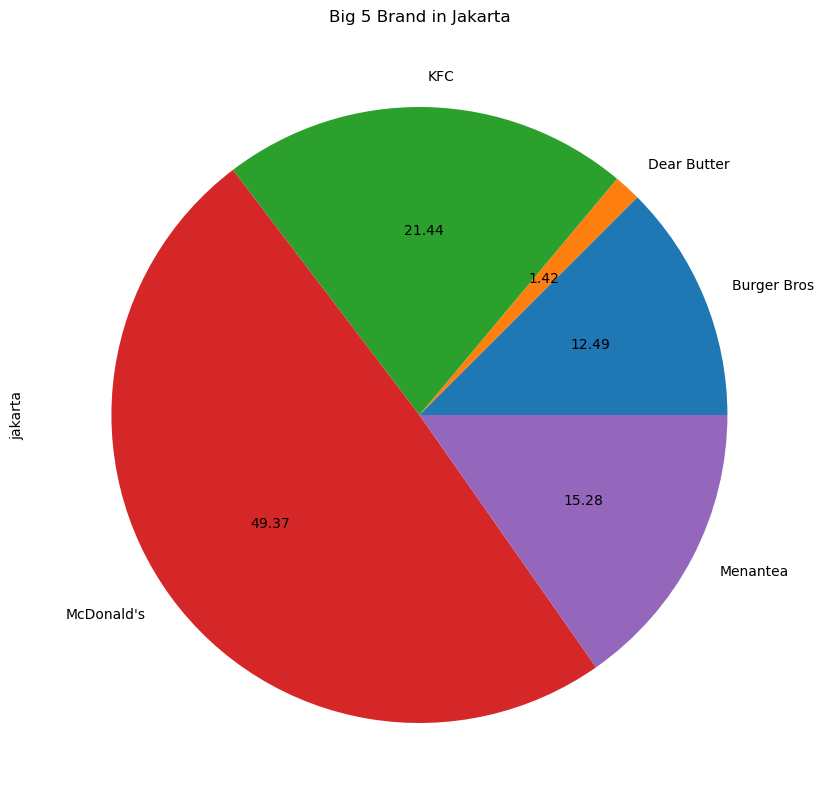

In [24]:
df3['jakarta'].plot(kind='pie', title='Big 5 Brand in Jakarta' ,figsize=(10,10), autopct='%.2f')

* Dikota Surabaya, brand terbanyak teradapat pada Mc.Donald (sama seperti Jakarta)

<AxesSubplot: title={'center': 'Big 5 Brand in Surabaya'}, ylabel='surabaya'>

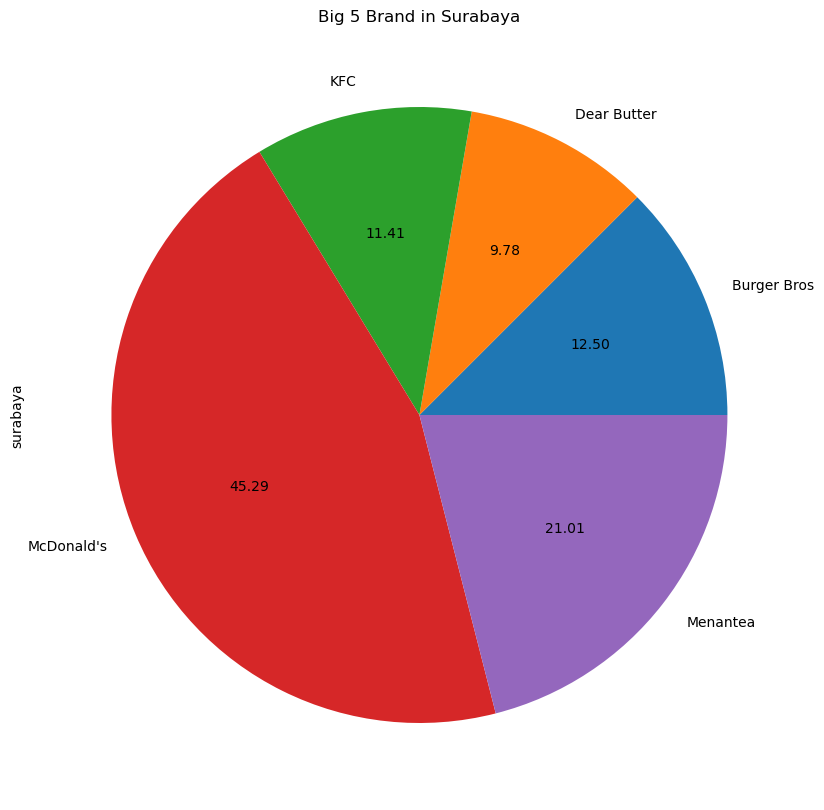

In [25]:
df3['surabaya'].plot(kind='pie', title='Big 5 Brand in Surabaya' ,figsize=(10,10), autopct='%.2f')

* Sedangkan Dikota Medan, brand terbanyak teradapat pada KFC yang mana berbeda dibandingkan kota lainnya

<AxesSubplot: title={'center': 'Big 5 Brand in Medan'}, ylabel='medan'>

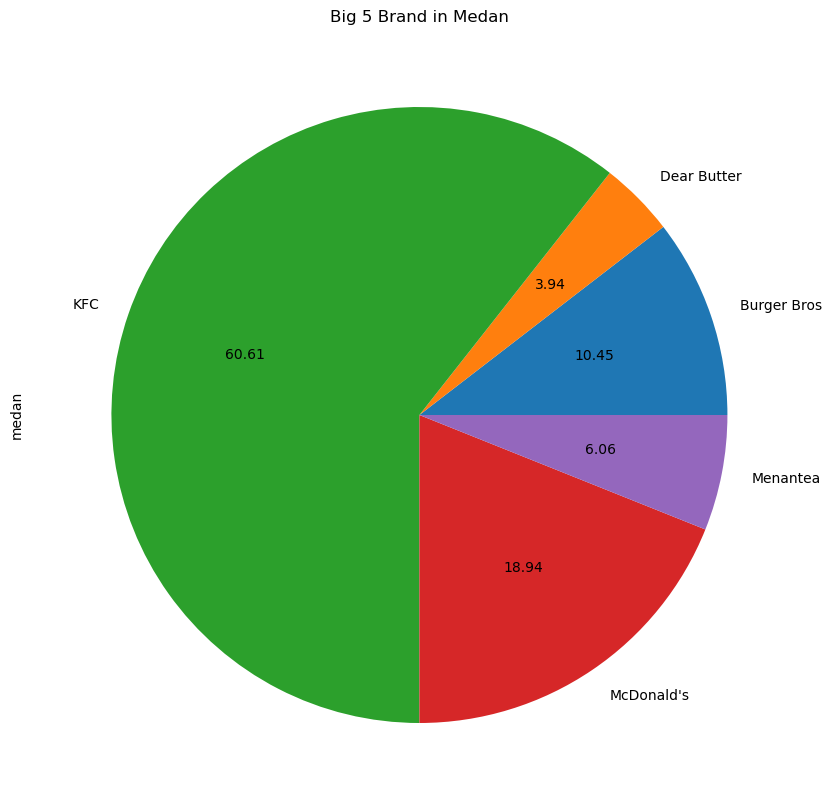

In [26]:
df3['medan'].plot(kind='pie', title='Big 5 Brand in Medan' ,figsize=(10,10), autopct='%.2f')

## Split Category

* Melihat kategori apa yang terbanyak terdata di tiap kota

In [27]:
df[['category1','category2','category3','category4','category5']] = df['category'].str.split('/',expand=True,n=5)
df[['category1','category2','category3','category4','category5']].head()

,category1,category2,category3,category4,category5
0,Kopi,Minuman,Roti,None,None
1,Kopi,Minuman,Roti,None,None
2,Kopi,Minuman,Roti,None,None
3,Kopi,Minuman,Roti,None,None
4,Kopi,Minuman,Roti,None,None


In [28]:
cat1 = df['category1'].unique().tolist()
cat2 = df['category2'].unique().tolist()
cat3 = df['category3'].unique().tolist()
cat4 = df['category4'].unique().tolist()
cat5 = df['category5'].unique().tolist()

cat = cat1 + cat2 + cat3 + cat4 + cat5
cat = list(set(cat))
cat = [x for x in cat if x is not None]
print(cat)

['Martabak', 'Minuman', 'Jepang', 'Kopi', 'Thailand', 'Aneka nasi', 'Sate', 'Ayam & bebek', 'Barat', 'Bakmie', 'Jajanan', 'Pizza & pasta', 'Korea', 'Timur Tengah', 'Sweets', 'Chinese', 'Cepat saji', 'India', 'Roti', 'Seafood', 'Bakso & soto']


In [29]:
city = df['merchant_area'].unique()
kota = []
kategori = []
jlh_merchant = []

for i in city:
  for j in cat:
    data_city = df[df.merchant_area==i]
    n = data_city[data_city.category.str.startswith(j)].drop_duplicates('merchant_name').shape[0]
    kota.append(i)
    kategori.append(j)
    jlh_merchant.append(n)
    #print('kota {} jumlah merchent brand {} sebanyak {}'.format(i,j,n))

df4 = pd.DataFrame(list(zip(kota, kategori, jlh_merchant)),columns =['Kota', 'Kategori', 'jumlah merchant'])

jkt2 = df4[df4.Kota=='jakarta'].sort_values(['jumlah merchant'],ascending=False).head(5)
display('Jakarta most Category Merchant =', jkt2)
print('\n')
mdn2 = df4[df4.Kota=='medan'].sort_values(['jumlah merchant'],ascending=False).head(5)
display('Medan most Category Merchant =', mdn2)
print('\n')
sby2 = df4[df4.Kota=='surabaya'].sort_values(['jumlah merchant'],ascending=False).head(5)
display('Surabaya most Category Merchant =', sby2)

'Jakarta most Category Merchant ='

,Kota,Kategori,jumlah merchant
1,jakarta,Minuman,35
10,jakarta,Jajanan,32
16,jakarta,Cepat saji,24
14,jakarta,Sweets,21
5,jakarta,Aneka nasi,20


'Medan most Category Merchant ='

,Kota,Kategori,jumlah merchant
31,medan,Jajanan,43
22,medan,Minuman,41
26,medan,Aneka nasi,30
37,medan,Cepat saji,24
24,medan,Kopi,19


'Surabaya most Category Merchant ='

,Kota,Kategori,jumlah merchant
43,surabaya,Minuman,56
52,surabaya,Jajanan,46
47,surabaya,Aneka nasi,35
58,surabaya,Cepat saji,21
60,surabaya,Roti,20


* Di Kota jakarta kategori paling banyak adalah yang menjual minuman yaitu sebesar 35 merchant

<AxesSubplot: xlabel='Kategori'>

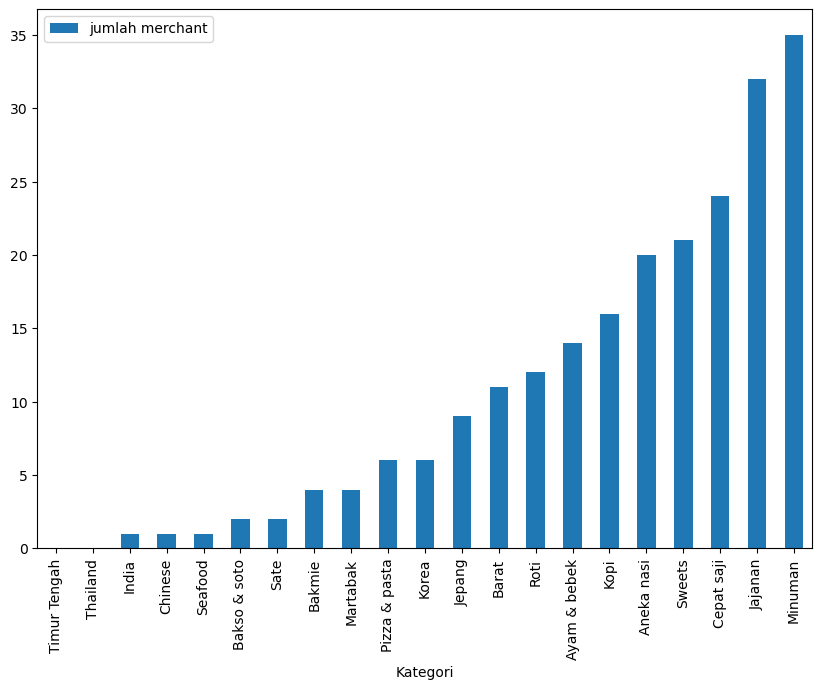

In [30]:
CJ= df4.loc[df4['Kota']=='jakarta',['Kategori','jumlah merchant']].sort_values(by='jumlah merchant', ascending=True)
CJ.set_index('Kategori',inplace=True)
CJ.plot(kind='bar')

* Di Kota Surabaya kategori paling banyak adalah yang menjual minuman yaitu sebesar 56 merchant (sama dengan jakarta terbanyak adalah minuman, namun surabaya jumlahnya lebih banyak dibandingakan dengen jakarta)

<AxesSubplot: xlabel='Kategori'>

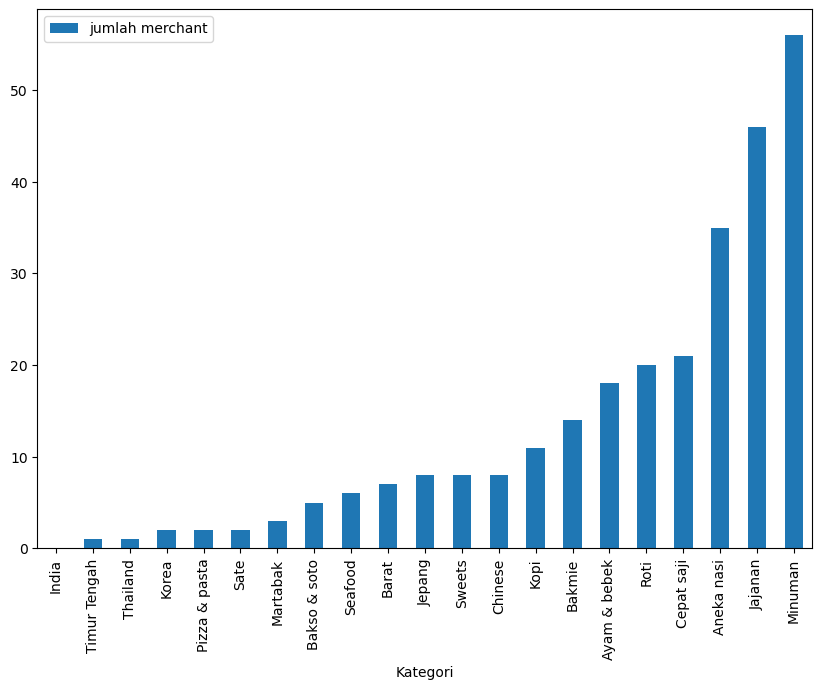

In [31]:
CS= df4.loc[df4['Kota']=='surabaya',['Kategori','jumlah merchant']].sort_values(by='jumlah merchant', ascending=True)
CS.set_index('Kategori',inplace=True)
CS.plot(kind='bar')

* Berbeda Di Kota Medan yang mana kategori paling banyak adalah yang menjual Jajanan yaitu sebesar 43 merchant

<AxesSubplot: xlabel='Kategori'>

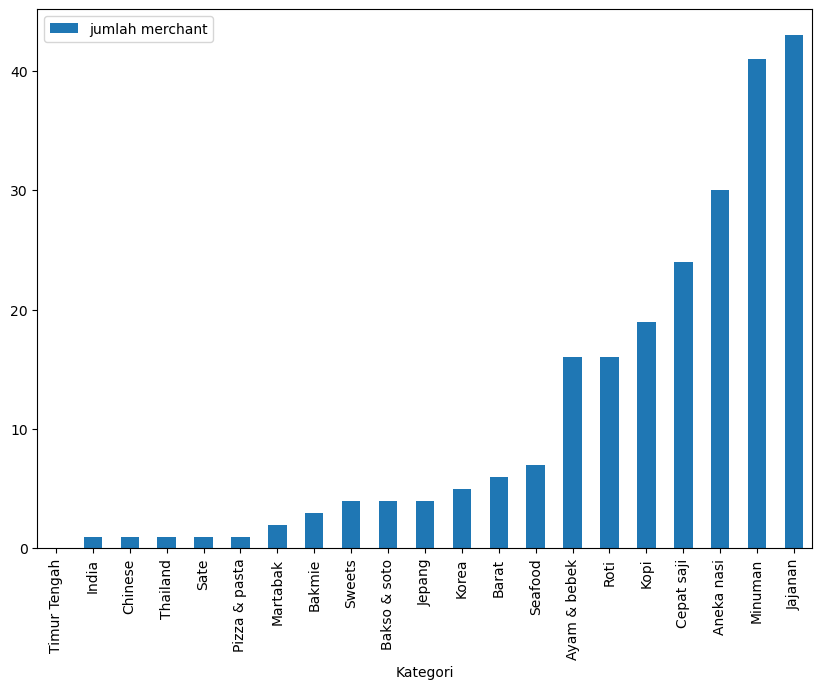

In [32]:
CM= df4.loc[df4['Kota']=='medan',['Kategori','jumlah merchant']].sort_values(by='jumlah merchant', ascending=True)
CM.set_index('Kategori',inplace=True)
CM.plot(kind='bar')

In [33]:
Medan= df.loc[df['merchant_area']=='medan'].sort_values(by='perc_disc', ascending=False)
Medan.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,Brand,Region,perc_disc,category1,category2,category3,category4,category5
14128,Ahmeds Kitchen,medan,Ayam & bebek/Aneka nasi/India,PPKM Paket Hemat,Paket Nasi Biryani Ayam Khas Dubai + Teh Manis...,66000.0,21000.0,1,Ahmeds Kitchen,None,68.181818,Ayam & bebek,Aneka nasi,India,None,None
14044,Ahmeds Kitchen,medan,Aneka nasi/India/Ayam & bebek,PPKM Paket Hemat,Paket Nasi Biryani Ayam Khas Dubai + Teh Manis...,66000.0,21000.0,1,Ahmeds Kitchen,None,68.181818,Aneka nasi,India,Ayam & bebek,None,None
15499,Bolen Quemami Bakery,medan,Roti,Menu Promo,Paha Ayam + Gratis Spartan,33000.0,13000.0,1,Bolen Quemami Bakery,None,60.606061,Roti,None,None,None,None
29238,"Warung Jivano, Marelan",medan,Aneka nasi/Minuman,Menu Promo,Ayam Penyet + Gratis Spartan,33500.0,13500.0,1,Warung Jivano,Marelan,59.701493,Aneka nasi,Minuman,None,None,None
29188,"Warung Jivano, Marelan",medan,Aneka nasi/Minuman,Menu Promo,Ayam Penyet + Gratis Spartan,33500.0,13500.0,1,Warung Jivano,Marelan,59.701493,Aneka nasi,Minuman,None,None,None


In [34]:
for i in Medan.columns:
  print('Value Variabel {} is {}'.format(i,Medan[i].unique()))

Value Variabel merchant_name is ['Ahmeds Kitchen' 'Bolen Quemami Bakery' 'Warung Jivano, Marelan'
 'Starbucks, Multatuli Medan' 'Sushi Yay, Medan Setiabudi'
 'Richeese Factory, Binjai' 'Shawarma Sultan, Setiabudi'
 'Burger King, Ring Road' 'Besty Cemilan, Kapten Sumarsono'
 'Grand Liberty Restaurant' 'Kopi Yor, Medan' 'Pizza Roemah Enak, Stabat'
 'Zeribowl, J City' 'Zeribowl, Delipark' 'Kokumi, Sun Plaza'
 'Burger Bros, Medan Maimun' 'Xi Bo Ba, Medan Gaperta'
 "McDonald's, Binjai" 'Marina Bay Seafood' 'Siomay Podomoro, Polonia'
 'Offle, Medan Mall' 'Zeribowl, Sun Plaza' 'Pulut Durian Rahmadsyah'
 'Takoyaki Kansai, Medan' 'Hoffen milk bar' 'Salad Buah Tuasan'
 'Ome Crepes Johor' 'Muda Burgerbar, Binjai' 'Warung Nyam Nyam, Pasundan'
 'Takoyaki Genki' 'Istanbul Kebab'
 'POTTE Cafe & All Day Dining, Medan Selayang' 'PECAL BERKAH 89'
 'Chicken Crush, Gaperta' 'Chicken Crush, Tuasan' 'Chicken Crush, Delitua'
 'Menantea, Ringroad Medan' 'Martabak Bollywood Medan'
 'Bakmie Kembar Manurung' 'Ba

In [35]:
for i in Medan.columns:
  print('total variation {} as much {}'.format(i,Medan[i].nunique()))

total variation merchant_name as much 215
total variation merchant_area as much 1
total variation category as much 137
total variation display as much 1071
total variation product as much 9272
total variation price as much 883
total variation discount_price as much 902
total variation isDiscount as much 2
total variation Brand as much 200
total variation Region as much 86
total variation perc_disc as much 226
total variation category1 as much 20
total variation category2 as much 19
total variation category3 as much 19
total variation category4 as much 2
total variation category5 as much 0


# `Pengambilan Kesimpulan`

## **`Central Tendency`**

## Pengecekan outliers di Jakarta

* pertama dilakukan filtering untuk data di kota jakarta

In [36]:
Jakarta= df.loc[df['merchant_area']=='jakarta'].sort_values(by='perc_disc', ascending=False)
Jakarta.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,Brand,Region,perc_disc,category1,category2,category3,category4,category5
12698,"Starbucks, Sudirman Bogor",jakarta,Roti/Minuman/Kopi,Bundling Package,Cinnamon Roll Cream Frappuccino + Iced Specula...,114000.0,50000.0,1,Starbucks,Sudirman Bogor,56.140351,Roti,Minuman,Kopi,None,None
12554,"Starbucks, Sudirman Bogor",jakarta,Kopi/Roti/Minuman,Bundling Package,Cinnamon Roll Cream Frappuccino + Iced Specula...,114000.0,50000.0,1,Starbucks,Sudirman Bogor,56.140351,Kopi,Roti,Minuman,None,None
12553,"Starbucks, Sudirman Bogor",jakarta,Kopi/Roti/Minuman,Bundling Package,Tiramisu Coffee Frappuccino + Iced Buttery Nut...,114000.0,50000.0,1,Starbucks,Sudirman Bogor,56.140351,Kopi,Roti,Minuman,None,None
12697,"Starbucks, Sudirman Bogor",jakarta,Roti/Minuman/Kopi,Bundling Package,Tiramisu Coffee Frappuccino + Iced Buttery Nut...,114000.0,50000.0,1,Starbucks,Sudirman Bogor,56.140351,Roti,Minuman,Kopi,None,None
12561,"Starbucks, Sudirman Bogor",jakarta,Kopi/Roti/Minuman,Pairing Set,LUNCH ( Selected food + Iced Shaken Lemonade/A...,98000.0,49000.0,1,Starbucks,Sudirman Bogor,50.000000,Kopi,Roti,Minuman,None,None


In [37]:
for i in Jakarta.columns:
  print('Value Variabel {} is {}'.format(i,Jakarta[i].unique()))

Value Variabel merchant_name is ['Starbucks, Sudirman Bogor' 'FamilyMart, Sequis Tower'
 'Corndog Doona, Pinang' 'XXI Cafe, PGC' 'HokBen, Bogor Yasmin'
 'HokBen, Kitchen Otista' 'Murabae Bento, Palmerah'
 'Cinepolis, Pondok Kelapa' 'Golden Lamian, Jatiwaringin'
 'Xi Bo Ba, Ramayana Cileungsi' 'XIBOBA, Bangbarung'
 'XIBOBA, Ramayana Parung' 'XIBOBA, Summarecon Bekasi'
 'Geprek Bensu, Karawang' 'Burger Bros, Bintaro' 'Burger Bros, Ciledug'
 "McDonald's, Pekayon" "McDonald's, Panjang" "McDonald's, Tambak"
 "McDonald's, Jatiwarna" "Gianni's Pizzeria" 'Longpan Pizza, Tugu'
 'MAB Toppoki, Jengki' 'Menantea, Jatiwaringin'
 'Menantea, Epicentrum Walk' 'Menantea, Pamulang Tangerang'
 'Menantea, Panglima Polim' 'Menantea, Tanjung Duren'
 'Menantea, Pemda Cibinong' 'Menantea, Tangcity' 'Sosis Bakar Gangan'
 'Crackling' 'Traffic Bun, Benhil' 'Traffic Bun, Buaran'
 'Lawson, UIN Kertamukti' 'Lawson, Sunter Kirana' 'Lawson, Akses UI'
 'Lawson, Kemang Raya' 'Lawson, Cempaka Mas' 'Lawson, Cipete Raya'


In [38]:
for i in Jakarta.columns:
  print('total variation {} as much {}'.format(i,Jakarta[i].nunique()))

total variation merchant_name as much 209
total variation merchant_area as much 1
total variation category as much 132
total variation display as much 1006
total variation product as much 7524
total variation price as much 1011
total variation discount_price as much 1027
total variation isDiscount as much 2
total variation Brand as much 168
total variation Region as much 115
total variation perc_disc as much 240
total variation category1 as much 19
total variation category2 as much 17
total variation category3 as much 18
total variation category4 as much 8
total variation category5 as much 2


In [39]:
Jakarta.count()

merchant_name     14028
merchant_area     14028
category          14028
display           14028
product           14028
price             14028
discount_price    14028
isDiscount        14028
Brand             14028
Region            11329
perc_disc         14028
category1         14028
category2         10057
category3          7811
category4          2319
category5           243
dtype: int64

* Dilakukan pencarian central tendency
    * range: 1,979,999
    * Mean: 50312.20
    * Median: 26500.0
    * Mode: 18,000

In [40]:
numcols = ['discount_price']
for col in numcols:
    print(Jakarta[col].name + ' range: ' + str(Jakarta[col].max() - Jakarta[col].min()))

discount_price range: 1979999.0


In [41]:
Jakarta['discount_price'].mean()

50312.20544625036

In [42]:
Jakarta['discount_price'].median()

26500.0

In [43]:
Jakarta['discount_price'].mode()

0    18000.0
Name: discount_price, dtype: float64

* Pencarian nilai Quantile pada data Jakarta

In [44]:
print(Jakarta['discount_price'].quantile([0, 0.25, 0.5, 0.75, 1.0]))

0.00          1.0
0.25      16000.0
0.50      26500.0
0.75      49000.0
1.00    1980000.0
Name: discount_price, dtype: float64


### Box Plot
dapat dilihat dari box plot, bahwa terdapat banyak outliers dan diduga data tidak terdistribusi dengan normal

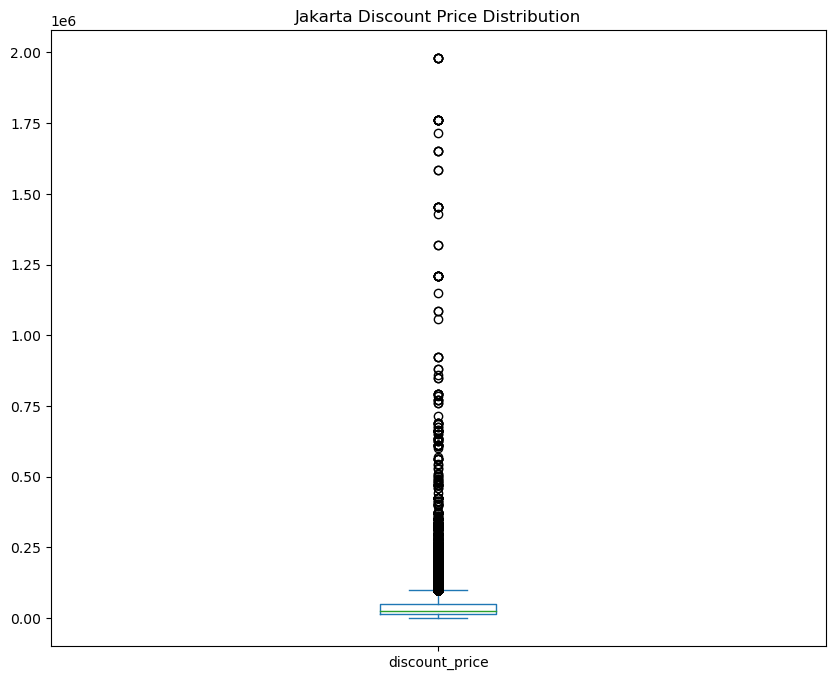

In [45]:
Jakarta['discount_price'].plot(kind='box', title='Jakarta Discount Price Distribution', figsize=(10,8))
plt.show()

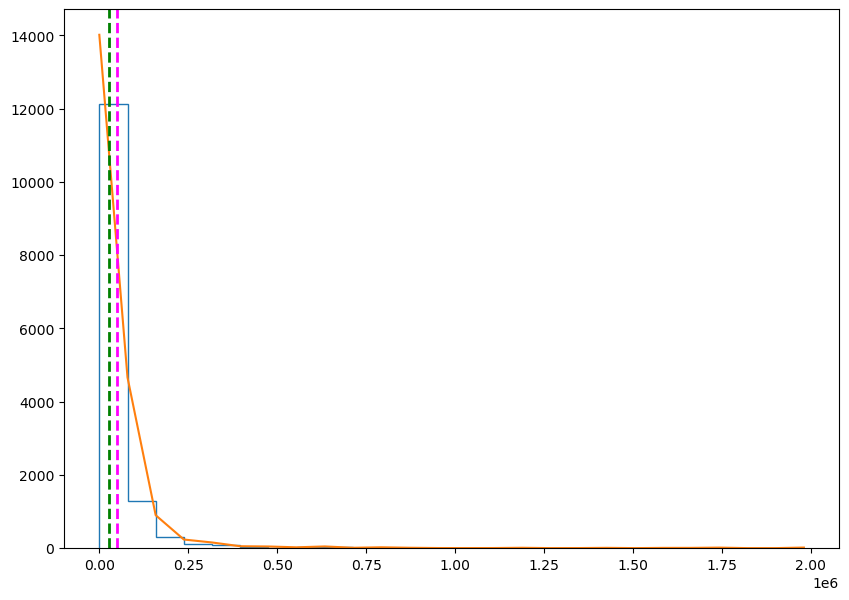

In [46]:
discount_price = Jakarta['discount_price']
density = stats.gaussian_kde(discount_price)
n, x, _ = plt.hist(discount_price, histtype='step', bins=25)  
plt.plot(x, density(x)*70**5)
plt.axvline(discount_price .mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(discount_price .median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

### Skew
*   Dilihat dari nilai skew dan bentuk skew, dapat dikatakan bahwa data terdistribusi tidak nomral karena nilai skew sangat jauh dari 0 dan data merupakan right skew

discount_price skewness: 10.05816899295985
discount_price kurtosis: 136.36064699786078


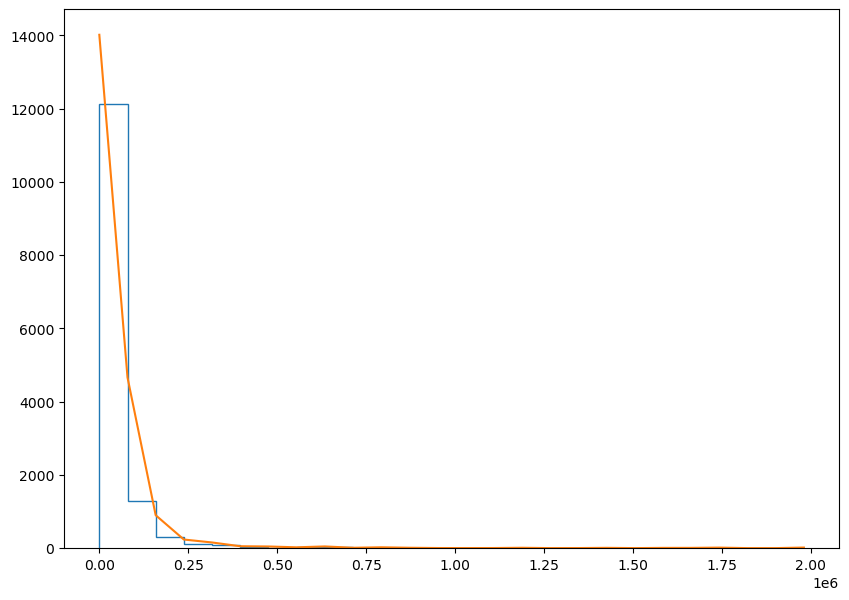

In [47]:
numcols = ['discount_price']
for col in numcols:
    print(Jakarta[col].name + ' skewness: ' + str(Jakarta[col].skew()))
    print(Jakarta[col].name + ' kurtosis: ' + str(Jakarta[col].kurt()))
    density = stats.gaussian_kde(Jakarta[col])
    n, x, _ = plt.hist(Jakarta[col], histtype='step', bins=25)  
    plt.plot(x, density(x)*70**5)
    plt.show()
    print('\n')

* Pencarian data batas atas untuk handling outliers
* Karena data terdistribusi tidak normal, maka untuk melakukan pengecekan outliers digunakan IQR
* dikalikan dengan 3 karena terdapat kasus extreme outliers
* dari hasil batas max, maka jika nilai load weight melebihi melebihi 148,000 dapat dikatakan sebagai outliers.

In [48]:
I = 49000.0+(3*(49000.0-16000.0))
print('Batas Max: ', I)

Batas Max:  148000.0


In [49]:
Jak = Jakarta.loc[Jakarta['discount_price']>I].sort_values(by='discount_price', ascending=False)
Jak.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,Brand,Region,perc_disc,category1,category2,category3,category4,category5
13332,"The Garrison, Kemang",jakarta,Barat,Rum,Bacardi Light,1980000.0,1980000.0,0,The Garrison,Kemang,0.0,Barat,None,None,None,None
13327,"The Garrison, Kemang",jakarta,Barat,Scotch Whiskey,Johnnie Walker Red Label,1980000.0,1980000.0,0,The Garrison,Kemang,0.0,Barat,None,None,None,None
13328,"The Garrison, Kemang",jakarta,Barat,Gin,Gordon London Dry Gin,1980000.0,1980000.0,0,The Garrison,Kemang,0.0,Barat,None,None,None,None
4534,"Holywings Backyard, Kemang",jakarta,Sweets/Barat/Minuman,Main,Nasi Goreng Jutawan,1980000.0,1980000.0,0,Holywings Backyard,Kemang,0.0,Sweets,Barat,Minuman,None,None
4535,"Holywings Backyard, Kemang",jakarta,Sweets/Barat/Minuman,Main,Tomahawk,1980000.0,1980000.0,0,Holywings Backyard,Kemang,0.0,Sweets,Barat,Minuman,None,None


In [50]:
Jakarta.count()

merchant_name     14028
merchant_area     14028
category          14028
display           14028
product           14028
price             14028
discount_price    14028
isDiscount        14028
Brand             14028
Region            11329
perc_disc         14028
category1         14028
category2         10057
category3          7811
category4          2319
category5           243
dtype: int64

In [51]:
Jak.count()

merchant_name     711
merchant_area     711
category          711
display           711
product           711
price             711
discount_price    711
isDiscount        711
Brand             711
Region            613
perc_disc         711
category1         711
category2         499
category3         382
category4          22
category5           2
dtype: int64

In [52]:
print('Persentase outliers:', (711/14028)*100, "%")

Persentase outliers: 5.068434559452523 %


* dilihat dari ini, terdapat 711 outliers pada data Jakarta yang mana merupakan 5.06% data merupakan outliers sehingga data ini harus dilakukan penanganan.

In [53]:
J = Jak.index
J

Int64Index([13332, 13327, 13328,  4534,  4535,  4571,  4575,  4576,  4577,
             4579,
            ...
             2649, 12668, 12524,  5994, 10904,  2557,  3413,  3412,  4528,
             8633],
           dtype='int64', length=711)

In [54]:
Jakarta.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,Brand,Region,perc_disc,category1,category2,category3,category4,category5
12698,"Starbucks, Sudirman Bogor",jakarta,Roti/Minuman/Kopi,Bundling Package,Cinnamon Roll Cream Frappuccino + Iced Specula...,114000.0,50000.0,1,Starbucks,Sudirman Bogor,56.140351,Roti,Minuman,Kopi,None,None
12554,"Starbucks, Sudirman Bogor",jakarta,Kopi/Roti/Minuman,Bundling Package,Cinnamon Roll Cream Frappuccino + Iced Specula...,114000.0,50000.0,1,Starbucks,Sudirman Bogor,56.140351,Kopi,Roti,Minuman,None,None
12553,"Starbucks, Sudirman Bogor",jakarta,Kopi/Roti/Minuman,Bundling Package,Tiramisu Coffee Frappuccino + Iced Buttery Nut...,114000.0,50000.0,1,Starbucks,Sudirman Bogor,56.140351,Kopi,Roti,Minuman,None,None
12697,"Starbucks, Sudirman Bogor",jakarta,Roti/Minuman/Kopi,Bundling Package,Tiramisu Coffee Frappuccino + Iced Buttery Nut...,114000.0,50000.0,1,Starbucks,Sudirman Bogor,56.140351,Roti,Minuman,Kopi,None,None
12561,"Starbucks, Sudirman Bogor",jakarta,Kopi/Roti/Minuman,Pairing Set,LUNCH ( Selected food + Iced Shaken Lemonade/A...,98000.0,49000.0,1,Starbucks,Sudirman Bogor,50.000000,Kopi,Roti,Minuman,None,None


In [55]:
Jakarta.drop(J, inplace = True)

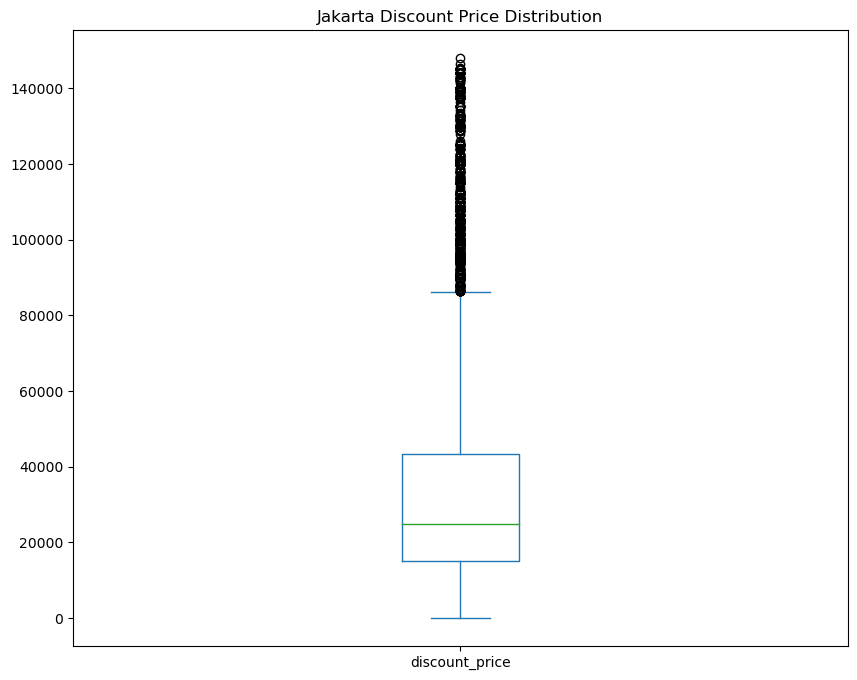

In [56]:
Jakarta['discount_price'].plot(kind='box', title='Jakarta Discount Price Distribution', figsize=(10,8))
plt.show()

* Dilakukan Trimming data agar mengurangi tingkat outliers data, yang mana menghapus data ouliers agar lolos uji normalitas dan data dapat digunkaan dalam uji

## Pengecekan outliers di Surabaya

* filtering data surabaya

In [57]:
Surabaya= df.loc[df['merchant_area']=='surabaya'].sort_values(by='perc_disc', ascending=False)
Surabaya.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,Brand,Region,perc_disc,category1,category2,category3,category4,category5
44762,"Wingstop, Jemursari",surabaya,Jajanan/Cepat saji/Barat/Ayam & bebek/Aneka nasi,Today's Offer,Wings for Home I,165000.0,78000.0,1,Wingstop,Jemursari,52.727273,Jajanan,Cepat saji,Barat,Ayam & bebek,Aneka nasi
44763,"Wingstop, Jemursari",surabaya,Jajanan/Cepat saji/Barat/Ayam & bebek/Aneka nasi,Today's Offer,Wings for Home II,202000.0,98000.0,1,Wingstop,Jemursari,51.485149,Jajanan,Cepat saji,Barat,Ayam & bebek,Aneka nasi
31380,"Boga Kitchen, Surabaya",surabaya,Jepang/Aneka nasi/Cepat saji,Promo Bundling Sushi Platter,2 Sushi Murame Platter,170001.0,85000.0,1,Boga Kitchen,Surabaya,50.000294,Jepang,Aneka nasi,Cepat saji,None,None
43504,"Tea Break, Tambaksari",surabaya,Minuman,Fantastic Tea Break,Bubble,8000.0,4000.0,1,Tea Break,Tambaksari,50.000000,Minuman,None,None,None,None
31401,"Boga Kitchen, Surabaya",surabaya,Jepang/Aneka nasi/Cepat saji,Sushi Yay!,Sushi Murame Platter,85000.0,42500.0,1,Boga Kitchen,Surabaya,50.000000,Jepang,Aneka nasi,Cepat saji,None,None


In [58]:
for i in Surabaya.columns:
  print('Value Variabel {} is {}'.format(i,Surabaya[i].unique()))

Value Variabel merchant_name is ['Wingstop, Jemursari' 'Boga Kitchen, Surabaya' 'Tea Break, Tambaksari'
 'Kedai Es Juragan' 'Subsidi' 'Burger King, Sidoarjo'
 'Nyayap, Metropolis Tenggilis' 'KOKUMI, Tunjungan Plaza'
 'Mangkokku, Tenggilis' 'HokBen, Suncity Sidoarjo' 'Ngastina, Bawean'
 'Warung Pindo' 'Lapis Srikandi' 'XIBOBA, Tunjungan Plaza'
 'XIBOBA, SDO Gedangan' 'XIBOBA, Tenggilis Surabaya'
 'Cosmic Coffee, Tulangan' 'WARMINDO CJDW' "Toby's, Tenggilis"
 "Toby's, Wiyung" 'Burger Bros, Genteng' "McDonald's, Merr Surabaya"
 'Laritta Bakery, Manukan' 'Seblak Gobyos, Sedati'
 'Seblak Gobyos, Jemursari' 'Martabak Hawaii, Gedangan'
 'KEBULI JORDAN SURABAYA' 'Creme Croffle' 'Aneka Bothok, Sukolilo'
 'Yasaka Fried Chicken, Sukolegok' 'Menantea, Gwalk Surabaya'
 'Mejishi Sushi' 'Pocong Pancong Wage' 'Bubur Punokawan'
 'Ngasyapp!!, Plaza Surabaya' 'Ngasyapp!!, Gress Mall' 'Flossy Croffle'
 'M2M, Mojosari' 'Haus!, Delta Sari' 'Haus!, Siwalankerto'
 'Haus!, Manukan' 'Traffic Bun, Bawean' 'KAFE 

In [59]:
for i in Surabaya.columns:
  print('total variation {} as much {}'.format(i,Surabaya[i].nunique()))

total variation merchant_name as much 263
total variation merchant_area as much 1
total variation category as much 161
total variation display as much 1468
total variation product as much 10140
total variation price as much 1026
total variation discount_price as much 1033
total variation isDiscount as much 2
total variation Brand as much 241
total variation Region as much 107
total variation perc_disc as much 296
total variation category1 as much 20
total variation category2 as much 19
total variation category3 as much 19
total variation category4 as much 6
total variation category5 as much 1


* Pengecekan central tendency di Surabaya:
    * Range: 1,979,999.0
    * Mean: 39,938.41420312705
    * Median: 19,200.0
    * Mode: 15,000

In [60]:
numcols = ['discount_price']
for col in numcols:
    print(Surabaya[col].name + ' range: ' + str(Surabaya[col].max() - Surabaya[col].min()))

discount_price range: 1979999.0


In [61]:
Surabaya['discount_price'].mean()

39938.41420312705

In [62]:
Surabaya['discount_price'].median()

19200.0

In [63]:
Surabaya['discount_price'].mode()

0    15000.0
Name: discount_price, dtype: float64

In [64]:
print(Surabaya['discount_price'].quantile([0, 0.25, 0.5, 0.75, 1.0]))

0.00          1.0
0.25      12000.0
0.50      19200.0
0.75      37000.0
1.00    1980000.0
Name: discount_price, dtype: float64


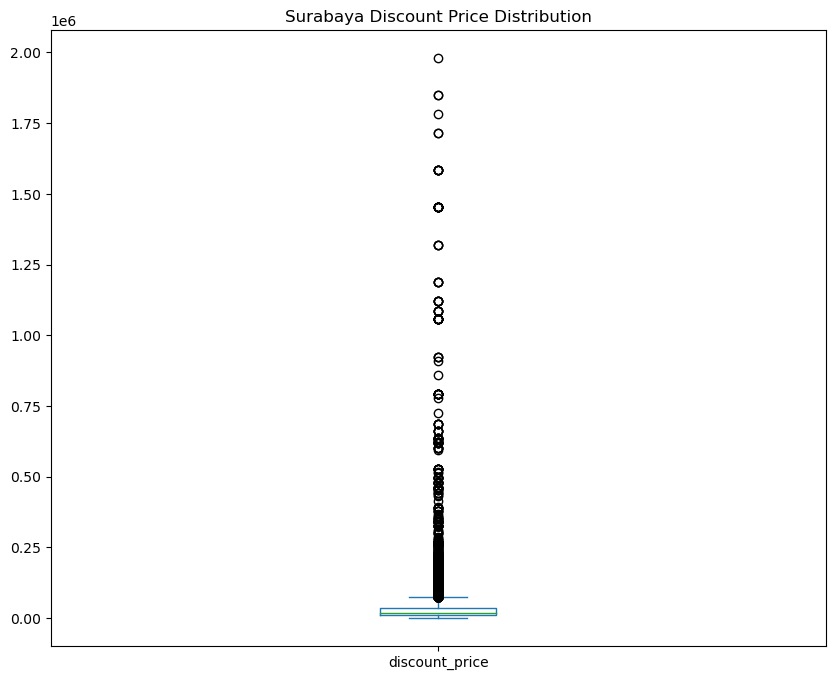

In [65]:
Surabaya['discount_price'].plot(kind='box', title='Surabaya Discount Price Distribution', figsize=(10,8))
plt.show()

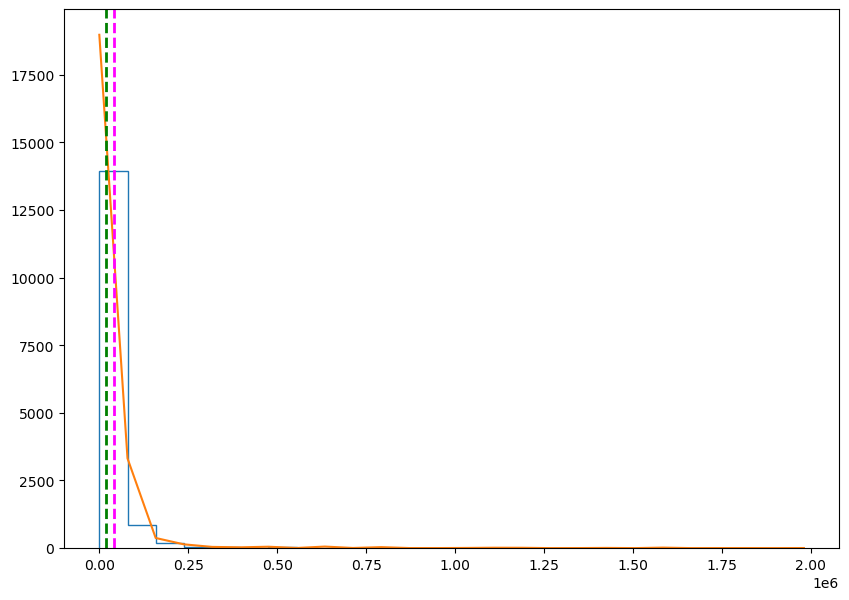

In [66]:
discount_price = Surabaya['discount_price']
density = stats.gaussian_kde(discount_price)
n, x, _ = plt.hist(discount_price, histtype='step', bins=25)  
plt.plot(x, density(x)*70**5)
plt.axvline(discount_price .mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(discount_price .median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

#### Pengecekan nilai skew

* dilihat dari nilai skew, data tidak terdistribusi dengan normal karena nilainya jauh dari angka 0 dan right skew

discount_price skewness: 10.418394648495601
discount_price kurtosis: 136.71251551780867


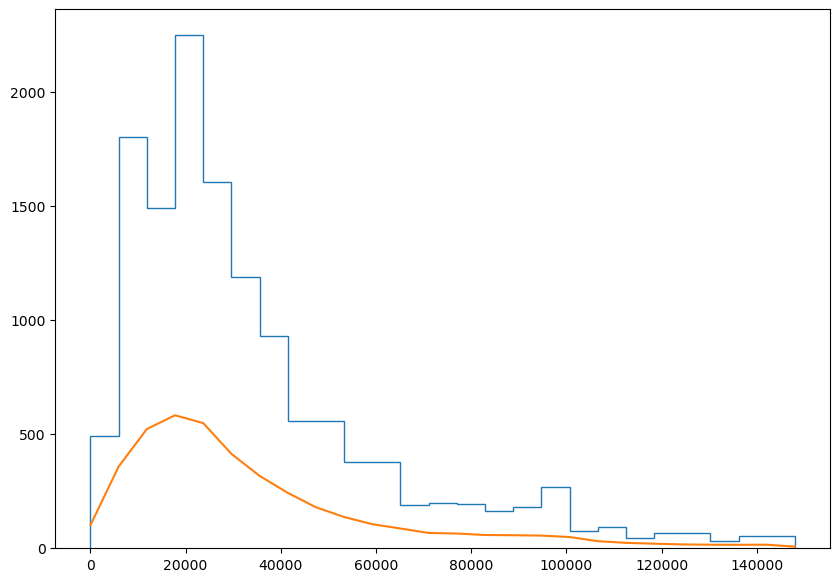

In [67]:
numcols = ['discount_price']
for col in numcols:
    print(Surabaya[col].name + ' skewness: ' + str(Surabaya[col].skew()))
    print(Surabaya[col].name + ' kurtosis: ' + str(Surabaya[col].kurt()))
    density = stats.gaussian_kde(Jakarta[col])
    n, x, _ = plt.hist(Jakarta[col], histtype='step', bins=25)  
    plt.plot(x, density(x)*30**5)
    plt.show()
    print('\n')

* Pencarian data batas atas untuk handling outliers
* Karena data terdistribusi tidak normal, maka untuk melakukan pengecekan outliers digunakan IQR
* dikalikan dengan 3 karena terdapat kasus extreme outliers
* dari hasil batas max, maka jika nilai load weight melebihi melebihi 112000.0 dapat dikatakan sebagai outliers.

In [68]:
IS = 37000.0+(3*(37000.0-12000.0))
print('Batas Max: ', IS)

Batas Max:  112000.0


In [69]:
Sur = Surabaya.loc[Surabaya['discount_price']>IS].sort_values(by='discount_price', ascending=False)
Sur.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,Brand,Region,perc_disc,category1,category2,category3,category4,category5
35948,Holywings Gold Basra,surabaya,Aneka nasi/Ayam & bebek,Tequila,Jose Cuervo Especial Reposado,1980000.0,1980000.0,0,Holywings Gold Basra,None,0.0,Aneka nasi,Ayam & bebek,None,None,None
36046,"Holywings, Kertajaya",surabaya,Aneka nasi,Scotch Whiskey,Monkey Shoulder,1848000.0,1848000.0,0,Holywings,Kertajaya,0.0,Aneka nasi,None,None,None,None
36064,"Holywings, Kertajaya",surabaya,Aneka nasi,Vodka,Grey Goose,1848000.0,1848000.0,0,Holywings,Kertajaya,0.0,Aneka nasi,None,None,None,None
36048,"Holywings, Kertajaya",surabaya,Aneka nasi,Gin,Hendrick's,1782000.0,1782000.0,0,Holywings,Kertajaya,0.0,Aneka nasi,None,None,None,None
35934,Holywings Gold Basra,surabaya,Aneka nasi/Ayam & bebek,American Whiskey,Jack Daniel's Fire,1716000.0,1716000.0,0,Holywings Gold Basra,None,0.0,Aneka nasi,Ayam & bebek,None,None,None


In [70]:
Surabaya.count()

merchant_name     15222
merchant_area     15222
category          15222
display           15222
product           15222
price             15222
discount_price    15222
isDiscount        15222
Brand             15222
Region            10683
perc_disc         15222
category1         15222
category2          9849
category3          7829
category4           872
category5            49
dtype: int64

In [71]:
Sur.count()

merchant_name     737
merchant_area     737
category          737
display           737
product           737
price             737
discount_price    737
isDiscount        737
Brand             737
Region            544
perc_disc         737
category1         737
category2         278
category3         155
category4          14
category5          10
dtype: int64

In [72]:
print('Persentase outliers:', (737/15222)*100, "%")

Persentase outliers: 4.841676520825121 %


* Jumlah outliers merupakan 737 yang mana merupakan 4.84 dari total data surabaya

In [73]:
S = Sur.index
S

Int64Index([35948, 36046, 36064, 36048, 35934, 35935, 35933, 35937, 35943,
            35939,
            ...
            32100, 32099, 30153, 32085, 32084, 32069, 42961, 32087, 36928,
            36021],
           dtype='int64', length=737)

In [74]:
Surabaya.drop(S, inplace = True)

In [75]:
Surabaya.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,Brand,Region,perc_disc,category1,category2,category3,category4,category5
44762,"Wingstop, Jemursari",surabaya,Jajanan/Cepat saji/Barat/Ayam & bebek/Aneka nasi,Today's Offer,Wings for Home I,165000.0,78000.0,1,Wingstop,Jemursari,52.727273,Jajanan,Cepat saji,Barat,Ayam & bebek,Aneka nasi
44763,"Wingstop, Jemursari",surabaya,Jajanan/Cepat saji/Barat/Ayam & bebek/Aneka nasi,Today's Offer,Wings for Home II,202000.0,98000.0,1,Wingstop,Jemursari,51.485149,Jajanan,Cepat saji,Barat,Ayam & bebek,Aneka nasi
31380,"Boga Kitchen, Surabaya",surabaya,Jepang/Aneka nasi/Cepat saji,Promo Bundling Sushi Platter,2 Sushi Murame Platter,170001.0,85000.0,1,Boga Kitchen,Surabaya,50.000294,Jepang,Aneka nasi,Cepat saji,None,None
43504,"Tea Break, Tambaksari",surabaya,Minuman,Fantastic Tea Break,Bubble,8000.0,4000.0,1,Tea Break,Tambaksari,50.000000,Minuman,None,None,None,None
31401,"Boga Kitchen, Surabaya",surabaya,Jepang/Aneka nasi/Cepat saji,Sushi Yay!,Sushi Murame Platter,85000.0,42500.0,1,Boga Kitchen,Surabaya,50.000000,Jepang,Aneka nasi,Cepat saji,None,None


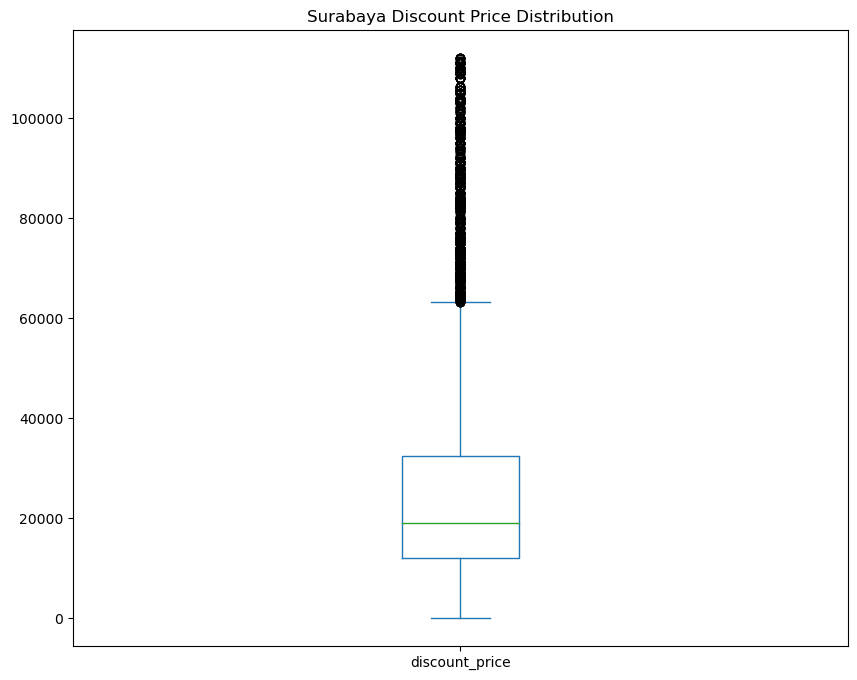

In [76]:
Surabaya['discount_price'].plot(kind='box', title='Surabaya Discount Price Distribution', figsize=(10,8))
plt.show()

* Dilakukan Trimming data agar mengurangi tingkat outliers data, yang mana menghapus data ouliers agar lolos uji normalitas dan data dapat digunkaan dalam uji

## Inferencial

## `Two Samples Independent Two Tailed`

* H0: μ_Discount Price Jakarta = μ_Discount Price Surabaya
* Ha: μ_Discount Price Surabaya != μ_Discount Price Jakarta

In [77]:
Jakarta_Disc_Price = Jakarta[Jakarta['merchant_area']=='jakarta']['discount_price']
Surabaya_Disc_Price = Surabaya[Surabaya['merchant_area']=='surabaya']['discount_price']


print('Discount Price Jakarta:',format(np.round(Jakarta_Disc_Price.mean())))
print('Discount Price Surabaya:',format(np.round(Surabaya_Disc_Price.mean())))

Discount Price Jakarta: 34312.0
Discount Price Surabaya: 25870.0


In [78]:
t_stat, p_val = stats.ttest_ind(Jakarta_Disc_Price, Surabaya_Disc_Price)
print('P-value:',p_val) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 5.729828977481388e-175
t-statistics: 28.403872020557333


Karena Confidence interval yang digunakan adalah 95%, maka karena P value kurang dari 0,05, maka dapat dikatakan secara statistik perbedaan rata-rata antara rata-rata diskoun di jakarta dengan rata-rata diskoun di surabaya

* H0 ditolak

/var/folders/kt/0jyjyc0j4x55lktsjdv8ch3w0000gn/T/ipykernel_6468/1123936855.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Jakarta_pop, label='Jakarta Discount Price',color='blue')
/var/folders/kt/0jyjyc0j4x55lktsjdv8ch3w0000gn/T/ipykernel_6468/1123936855.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

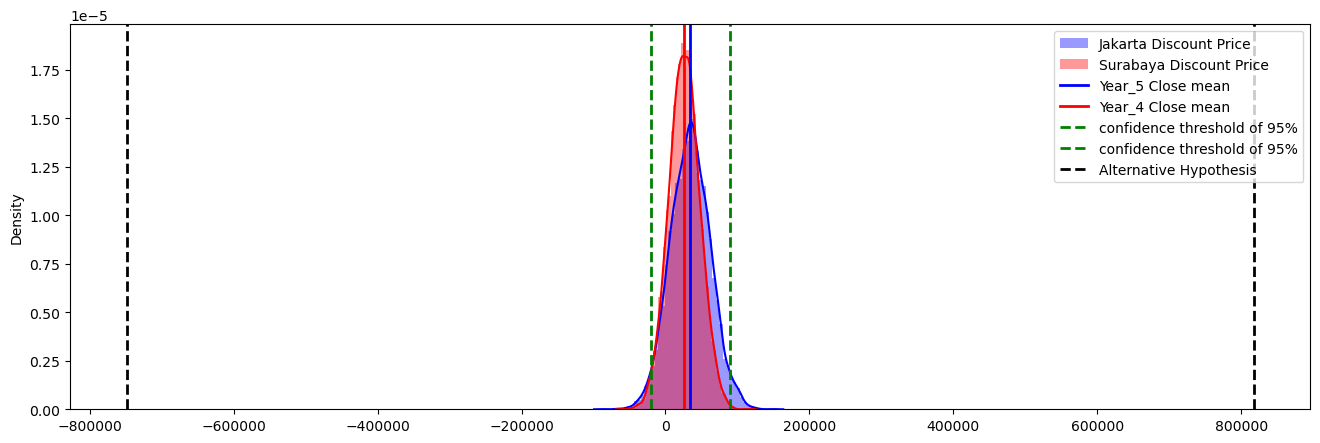

In [79]:
# simulation
Jakarta_pop = np.random.normal(Jakarta_Disc_Price.mean(),Jakarta_Disc_Price.std(),10000)
Surabaya_pop = np.random.normal(Surabaya_Disc_Price.mean(),Surabaya_Disc_Price.std(),10000)

# confidence interval based on Y5
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, Jakarta_Disc_Price.mean(), Jakarta_Disc_Price.std())

plt.figure(figsize=(16,5))
sns.distplot(Jakarta_pop, label='Jakarta Discount Price',color='blue')
sns.distplot(Surabaya_pop, label='Surabaya Discount Price',color='red')

# mean
plt.axvline(Jakarta_pop.mean(), color='blue', linewidth=2, label='Year_5 Close mean')
plt.axvline(Surabaya_pop.mean(), color='red',  linewidth=2, label='Year_4 Close mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(Jakarta_pop.mean()+t_stat*Jakarta_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(Jakarta_pop.mean()-t_stat*Jakarta_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()


# plt.savefig("Hypothesis Testing")
# print(ci[0])

# 5W+1H
* Kota mana dengan total merchan terbanyak?
    * Surabaya dengan 263 merchant
* Bagaimana rata-rata diskon di tiap tiap kota?
    * Rata-rata tertinggi di Jakarta adalah Bakmi Lopui 93  20.000000%
    * Rata-rata tertinggi di Medan adalah Besty Cemilan  16.079934%
    * Rata-rata tertinggi di Surabaya adalah Subsidi  19.091173
* Apakah setiap kota memiliki category tertinggi yang berbeda?
    * Jakarta Kategori tertinggi Minuman sebanyak 35 Merchant
    * Medan Kategori tertinggi Jajanan sebanyak 43 Merchant
    * Surabaya Kategori tertinggi Minuman sebanyak 56 Merchant
* Dimana kota yang memiliki jumlah brand terbanyak?
    * Jakarta dengan Brand Lawson sebanyak 1795 cabang
* Brand-brand terbesar apa saja yang berada di tiap kota?
    * Jakarta Mc donald
    * Medan KFC
    * Surabaya MC donald

In [80]:
df.to_csv('gofood_delivery.csv', index=False)